# import libraries

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [23]:
def visualize(data):
    for c in data.columns:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize":(8, 5)})
        if data[c].dtype=='int64' or data[c].dtype=='float64':
            f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
            plt.gca().set(xlabel= c,ylabel='Frequency')
            sns.boxplot(data[c], ax=ax_box , linewidth= 1.0)
            sns.histplot(data[c], ax=ax_hist , bins = 10,kde=True)
        else:
            plt.gca().set(xlabel= c,ylabel='Frequency')
            sns.histplot(data[c], bins = 10)

def visualizeDifference(c1,c2):
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8,5)})
    f, (c1_hist,c2_hist)= plt.subplots(2,sharex=True)
    sns.histplot(c1, ax=c1_hist, bins=10,kde=True, color='red',)
    sns.histplot(c2, ax=c2_hist, bins=10,kde=True, color='green',).set( xlabel = '\nRed: Before getting rid of NULLs. \nGreen: After getting rid of NULLs.')

def evaluate(model,x_train , y_train, x_test , y_test, y_predict):
    print(f'score x_train , y_train : {model.score(x_train , y_train)}')
    print(f'score x_test , y_test : {model.score(x_test , y_test)}')
    print(f'r2_score : {r2_score(y_test, y_predict)}')
    print(f'mean absolute err : {mean_absolute_error(y_predict, y_test)}')

def calcVIF(dt):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dt.columns
    vif_data["VIF"] = [variance_inflation_factor(dt.values, i) for i in range(len(dt.columns))]
    return vif_data

# import dataset

In [24]:
de= pd.read_csv('housing.csv')
df=df.copy()

# Exploring dataset

In [25]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# problems in dataset

# Getting Rid of Nulls :

<Figure size 576x360 with 0 Axes>

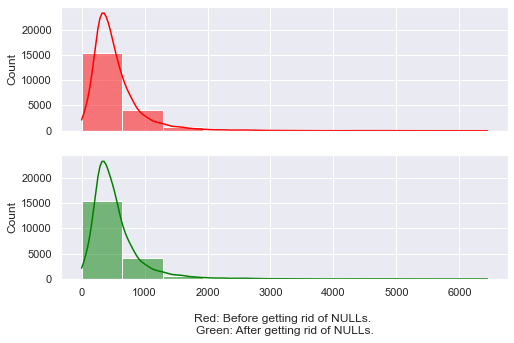

In [32]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
visualizeDifference(dt['total_bedrooms'],df['total_bedrooms'])

In [34]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# dealing with outliers

<Figure size 576x360 with 0 Axes>

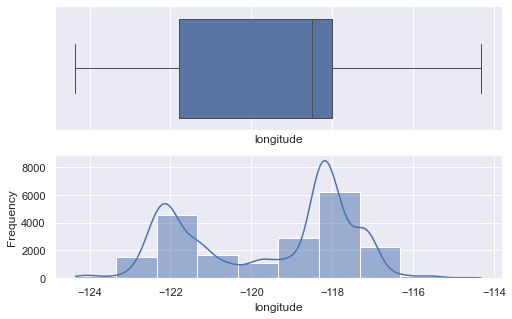

<Figure size 576x360 with 0 Axes>

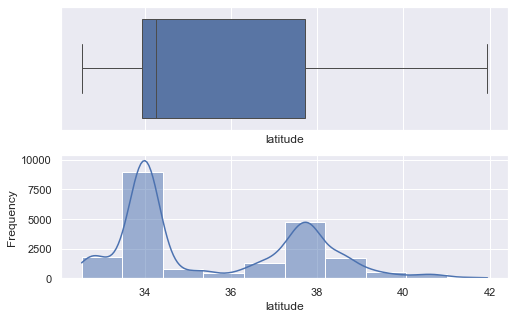

<Figure size 576x360 with 0 Axes>

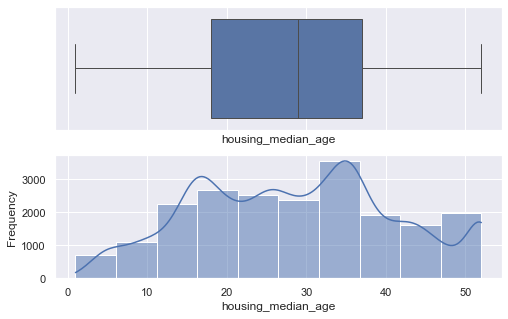

<Figure size 576x360 with 0 Axes>

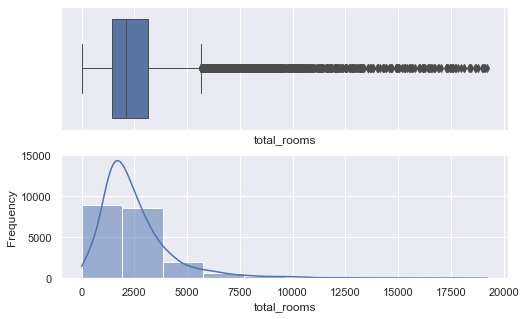

<Figure size 576x360 with 0 Axes>

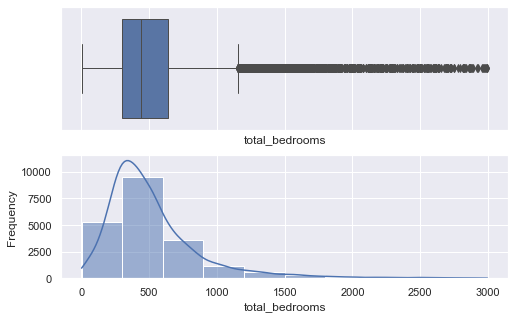

<Figure size 576x360 with 0 Axes>

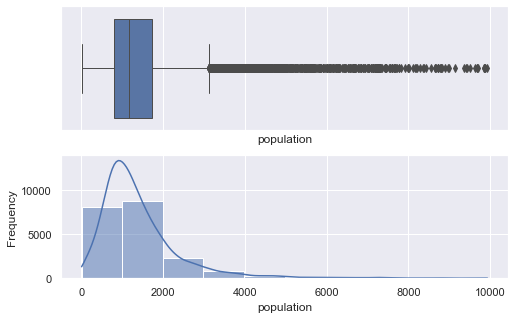

<Figure size 576x360 with 0 Axes>

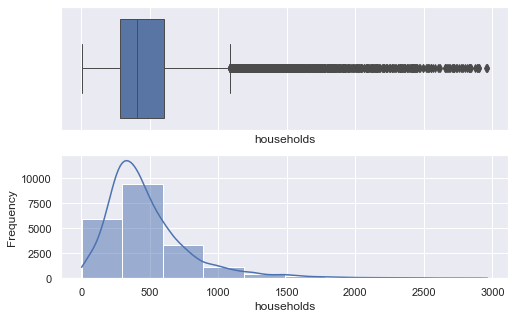

<Figure size 576x360 with 0 Axes>

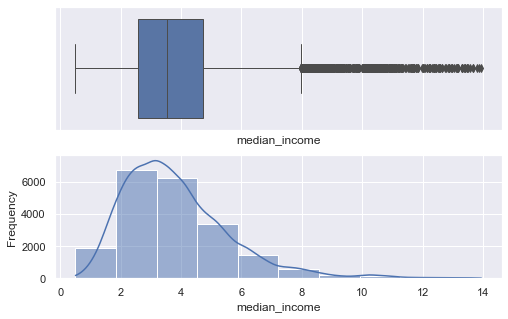

<Figure size 576x360 with 0 Axes>

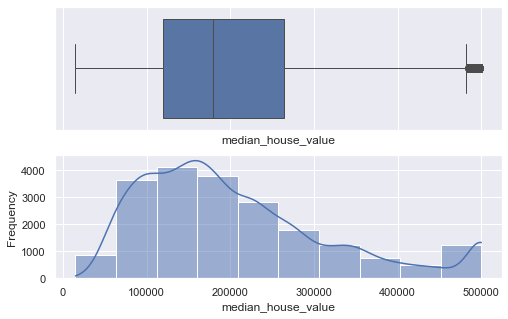

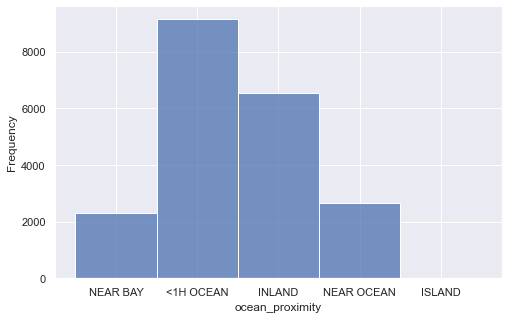

In [36]:
upperLimit=10000
df['population']=np.where((df['population']>upperLimit),df['population'].median(), df['population'])
upperLimit=20000
df['total_rooms']=np.where((df['total_rooms']>upperLimit),df['total_rooms'].median(), df['total_rooms'])
upperLimit=3000
df['total_bedrooms']=np.where((df['total_bedrooms']>upperLimit),df['total_bedrooms'].median(), df['total_bedrooms'])
upperLimit=3000
df['households']=np.where((df['households']>upperLimit),df['households'].median(), df['households'])
upperLimit=14
df['median_income']=np.where((df['median_income']>upperLimit),df['median_income'].median(), df['median_income'])
visualize(df)


<AxesSubplot:>

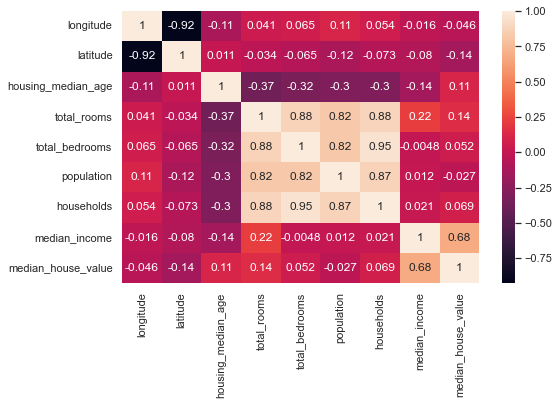

In [37]:
sns.heatmap(df.corr(),annot=True)

In [38]:
calcVIF(df.drop(['ocean_proximity'],axis=1))

,feature,VIF
0,longitude,624.527549
1,latitude,561.738759
2,housing_median_age,7.953607
3,total_rooms,19.415054
4,total_bedrooms,38.693937
5,population,14.224879
6,households,47.334359
7,median_income,14.078261
8,median_house_value,9.577346


In [39]:
x=df.drop(['ocean_proximity','median_house_value'],axis=1).values
y=df['median_house_value'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [40]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)
result=pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predict})

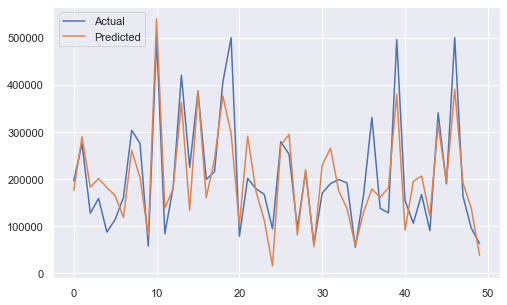

In [41]:
plt.plot(result[:50])
plt.legend(["Actual" , "Predicted"])

In [42]:
evaluate(lr,x_train , y_train, x_test , y_test, y_predict)

score x_train , y_train : 0.6219408579759298
score x_test , y_test : 0.611364927274247
r2_score : 0.611364927274247
mean absolute err : 51812.50986564912


In [43]:
rd=linear_model.BayesianRidge()
rd.fit(x_train , y_train)
y_predict=rd.predict(x_test)
result=pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predict})

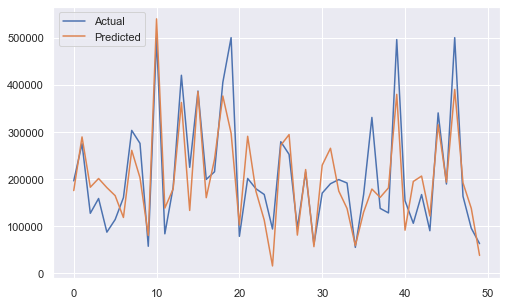

In [44]:
plt.plot(result[:50])
plt.legend(["Actual" , "Predicted"])

In [45]:
evaluate(rd,x_train , y_train, x_test , y_test, y_predict)

score x_train , y_train : 0.6219406275103428
score x_test , y_test : 0.6113716289989329
r2_score : 0.6113716289989329
mean absolute err : 51810.675439607476


<Figure size 576x360 with 0 Axes>

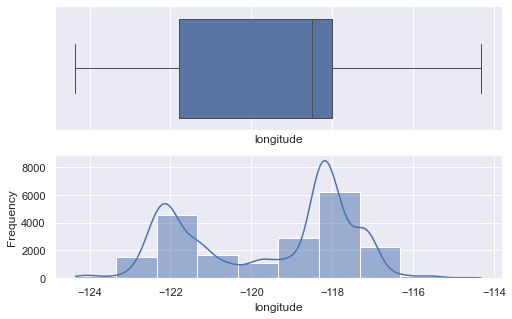

<Figure size 576x360 with 0 Axes>

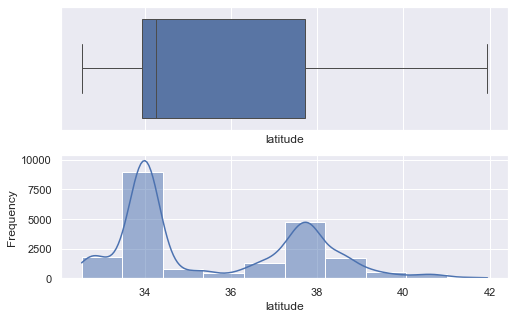

<Figure size 576x360 with 0 Axes>

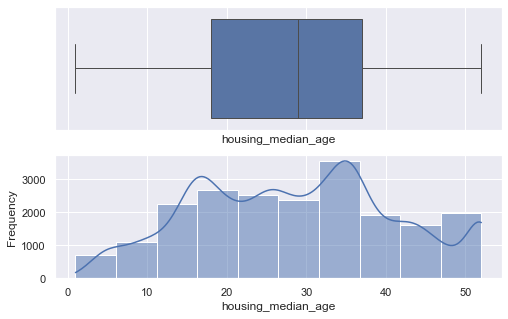

<Figure size 576x360 with 0 Axes>

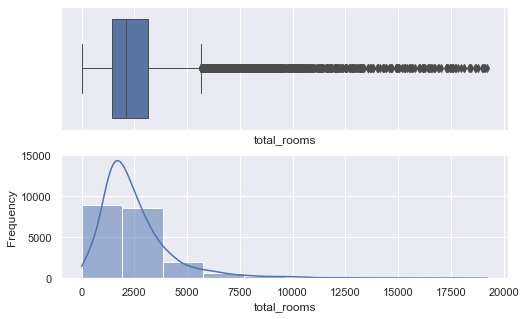

<Figure size 576x360 with 0 Axes>

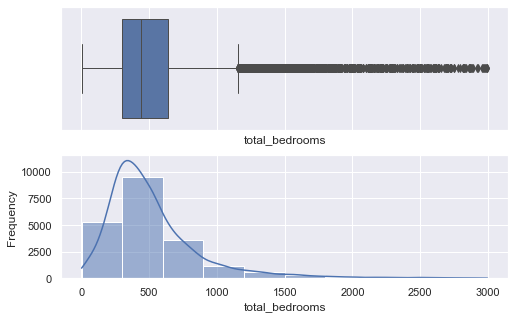

<Figure size 576x360 with 0 Axes>

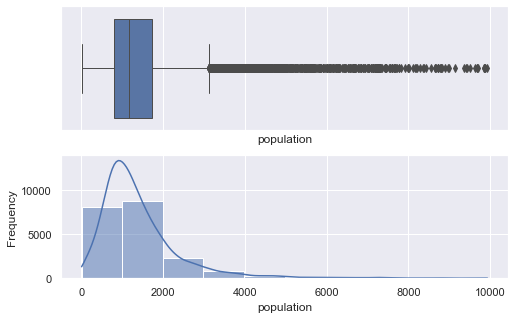

<Figure size 576x360 with 0 Axes>

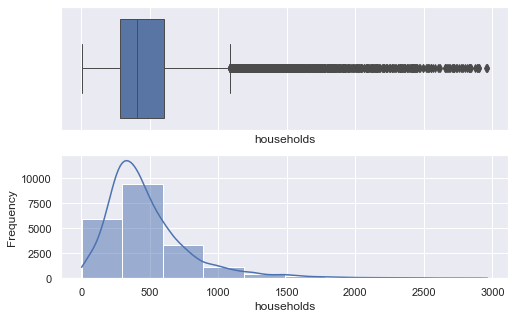

<Figure size 576x360 with 0 Axes>

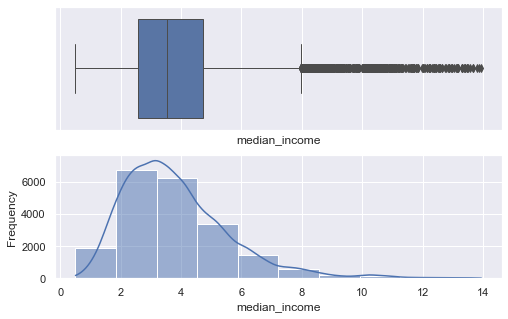

<Figure size 576x360 with 0 Axes>

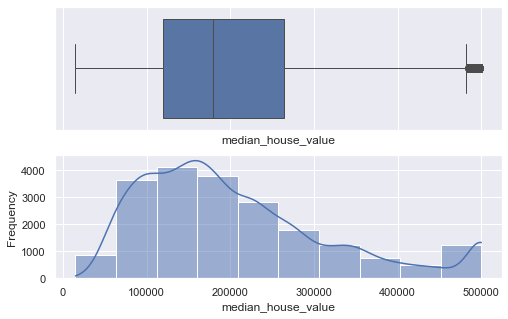

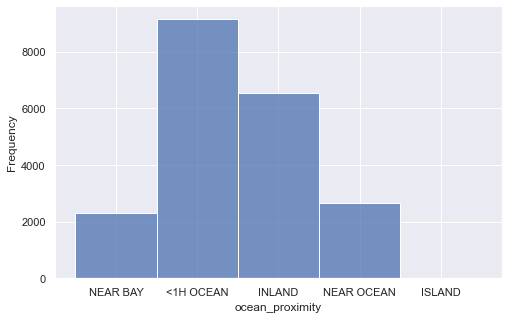

In [46]:
upperLimit=10000
df['population']=np.where((df['population']>upperLimit),df['population'].median(), df['population'])
upperLimit=20000
df['total_rooms']=np.where((df['total_rooms']>upperLimit),df['total_rooms'].median(), df['total_rooms'])
upperLimit=3000
df['total_bedrooms']=np.where((df['total_bedrooms']>upperLimit),df['total_bedrooms'].median(), df['total_bedrooms'])
upperLimit=3000
df['households']=np.where((df['households']>upperLimit),df['households'].median(), df['households'])
upperLimit=14
df['median_income']=np.where((df['median_income']>upperLimit),df['median_income'].median(), df['median_income'])
visualize(df)


<AxesSubplot:>

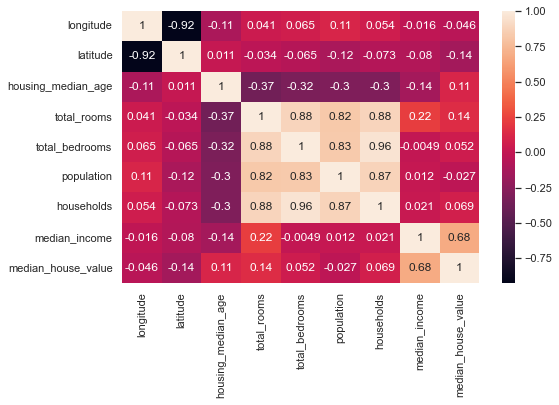

In [47]:
sns.heatmap(dt.corr(),annot=True)

In [49]:
calcVIF(df.drop(['ocean_proximity'],axis=1))

,feature,VIF
0,longitude,624.527549
1,latitude,561.738759
2,housing_median_age,7.953607
3,total_rooms,19.415054
4,total_bedrooms,38.693937
5,population,14.224879
6,households,47.334359
7,median_income,14.078261
8,median_house_value,9.577346


In [50]:
x=df.drop(['ocean_proximity','median_house_value'] , axis=1).values
y=df['median_house_value'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [52]:
lr=LinearRegression()
lr.fit(x_train , y_train)
y_predict=lr.predict(x_test)
result =pd.DataFrame({"Y_test":y_test , "Y_predict":y_predict})

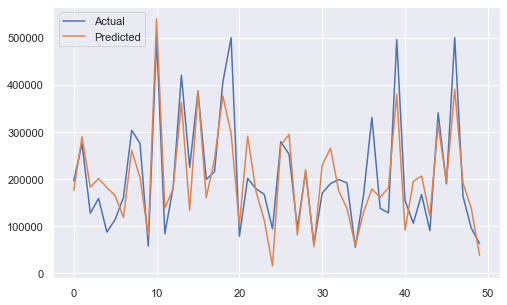

In [53]:
plt.plot(result[:50])
plt.legend(["Actual" , "Predicted"])


In [54]:
evaluate(lr,x_train , y_train, x_test , y_test, y_predict)

score x_train , y_train : 0.6219408579759298
score x_test , y_test : 0.611364927274247
r2_score : 0.611364927274247
mean absolute err : 51812.50986564912


In [55]:
rd=linear_model.BayesianRidge()
rd.fit(x_train , y_train)
y_predict=rd.predict(x_test)
result=pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predict})

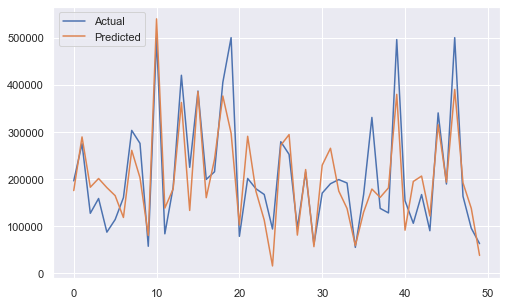

In [56]:
plt.plot(result[:50])
plt.legend(["Actual" , "Predicted"])

In [57]:
evaluate(lr,x_train , y_train, x_test , y_test, y_predict)

score x_train , y_train : 0.6219408579759298
score x_test , y_test : 0.611364927274247
r2_score : 0.6113716289989329
mean absolute err : 51810.675439607476


In [58]:
def iqrOutliers(c):
    Q1,Q3 = np.percentile(c , [25,75])
    IQR = Q3 - Q1
    limits=[Q1-1.5*IQR,Q3+1.5*IQR]
    return limits

<Figure size 576x360 with 0 Axes>

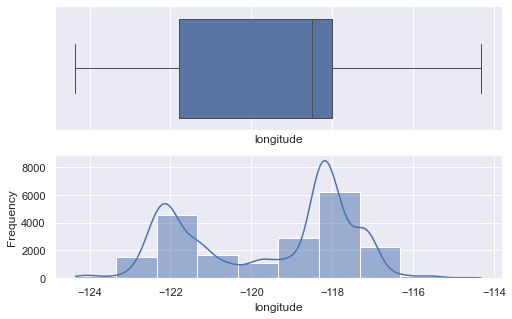

<Figure size 576x360 with 0 Axes>

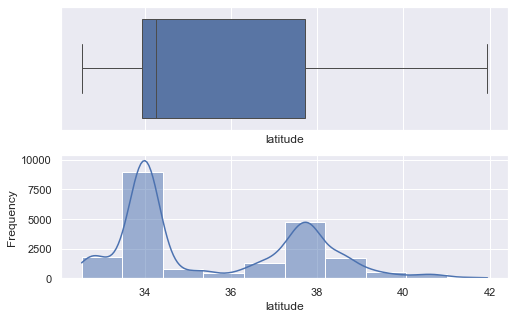

<Figure size 576x360 with 0 Axes>

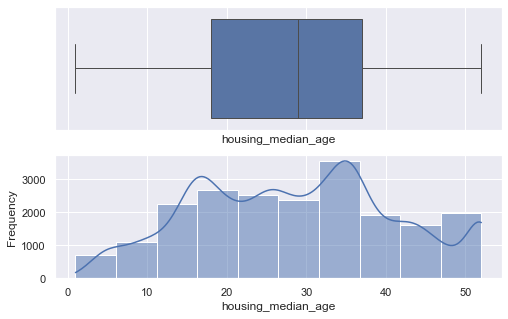

<Figure size 576x360 with 0 Axes>

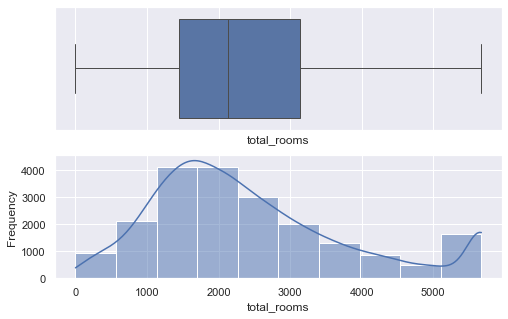

<Figure size 576x360 with 0 Axes>

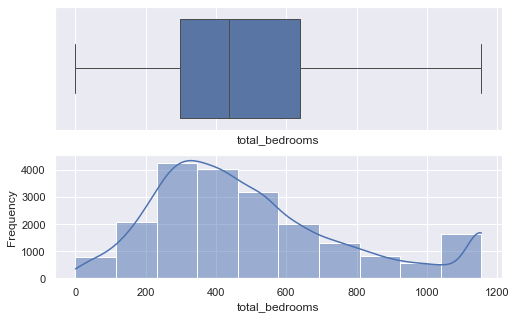

<Figure size 576x360 with 0 Axes>

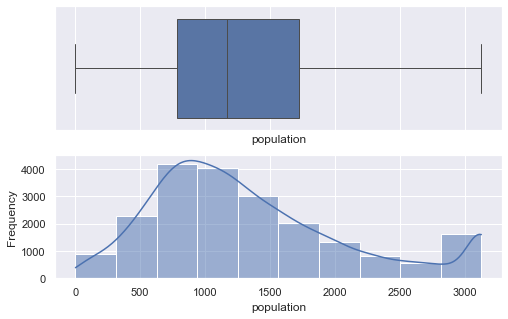

<Figure size 576x360 with 0 Axes>

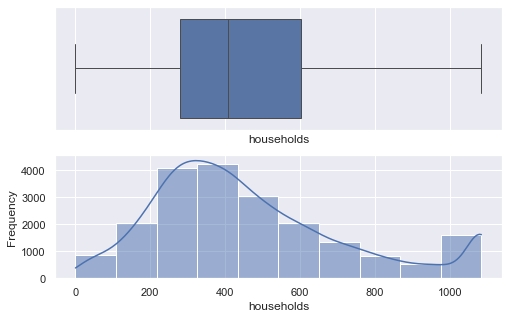

<Figure size 576x360 with 0 Axes>

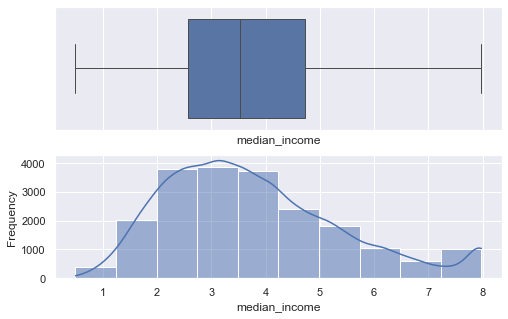

<Figure size 576x360 with 0 Axes>

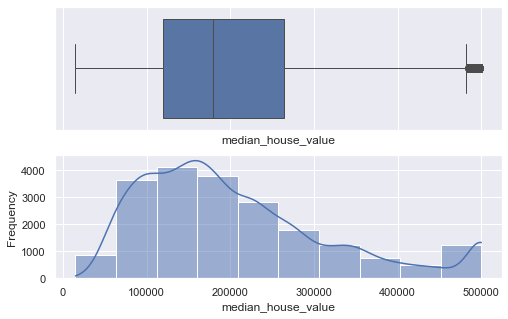

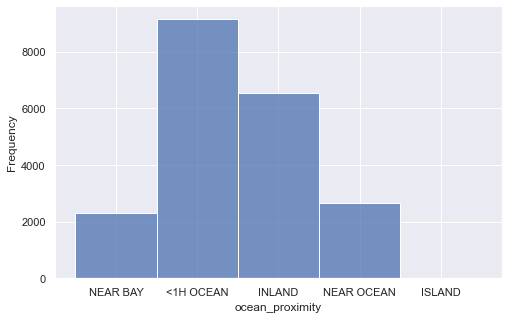

In [59]:
df['population']=np.where((df['population']>iqrOutliers(df['population'])[1]),iqrOutliers(df['population'])[1], df['population'])
upperLimit=20000
df['total_rooms']=np.where((df['total_rooms']>iqrOutliers(df['total_rooms'])[1]),iqrOutliers(df['total_rooms'])[1], df['total_rooms'])
upperLimit=3000
df['total_bedrooms']=np.where((df['total_bedrooms']>iqrOutliers(df['total_bedrooms'])[1]),iqrOutliers(df['total_bedrooms'])[1], df['total_bedrooms'])
upperLimit=3000
df['households']=np.where((df['households']>iqrOutliers(df['households'])[1]),iqrOutliers(df['households'])[1], df['households'])
upperLimit=14
df['median_income']=np.where((df['median_income']>iqrOutliers(df['median_income'])[1]),iqrOutliers(df['median_income'])[1], df['median_income'])

visualize(df)

<AxesSubplot:>

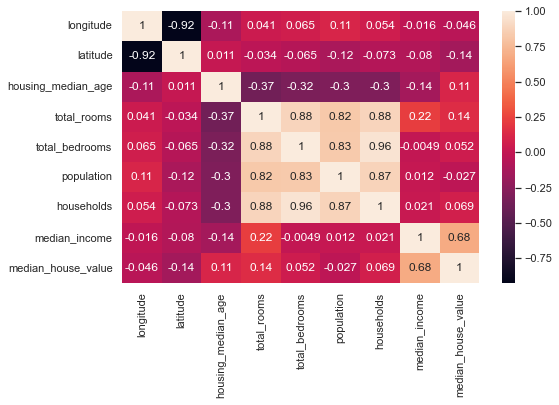

In [60]:
sns.heatmap(dt.corr(),annot=True)

In [61]:
calcVIF(df.drop(['ocean_proximity'],axis=1))

,feature,VIF
0,longitude,668.063838
1,latitude,587.090421
2,housing_median_age,8.108650
3,total_rooms,44.196474
4,total_bedrooms,88.511765
5,population,24.644831
6,households,100.469931
7,median_income,20.067610
8,median_house_value,10.092086


In [68]:
x=df.drop(['ocean_proximity','median_house_value'],axis=1).values
y=df['median_house_value'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [69]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)
result=pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predict})

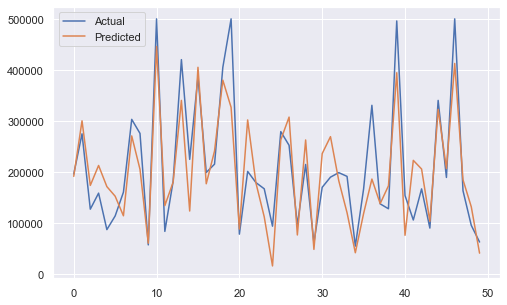

In [70]:
plt.plot(result[:50])
plt.legend(["Actual" , "Predicted"])

In [71]:
evaluate(lr,x_train , y_train, x_test , y_test, y_predict)

score x_train , y_train : 0.6369963893559296
score x_test , y_test : 0.6217905899623664
r2_score : 0.6217905899623664
mean absolute err : 51476.552457673555


In [72]:
rd=linear_model.BayesianRidge()
rd.fit(x_train , y_train)
y_predict=rd.predict(x_test)
result=pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predict})

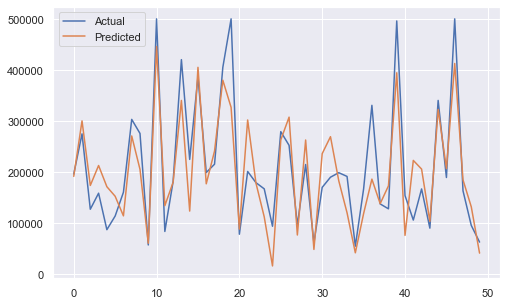

In [73]:
plt.plot(result[:50])
plt.legend(["Actual" , "Predicted"])

In [74]:
evaluate(lr,x_train , y_train, x_test , y_test, y_predict)

score x_train , y_train : 0.6369963893559296
score x_test , y_test : 0.6217905899623664
r2_score : 0.6217979993091366
mean absolute err : 51474.56054334867


<Figure size 576x360 with 0 Axes>

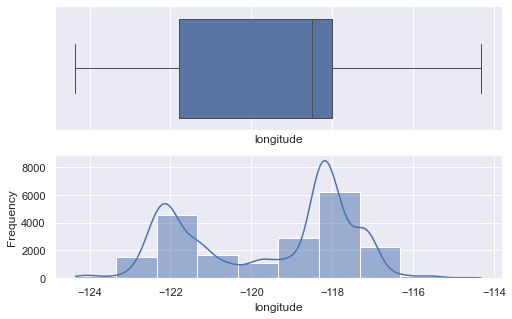

<Figure size 576x360 with 0 Axes>

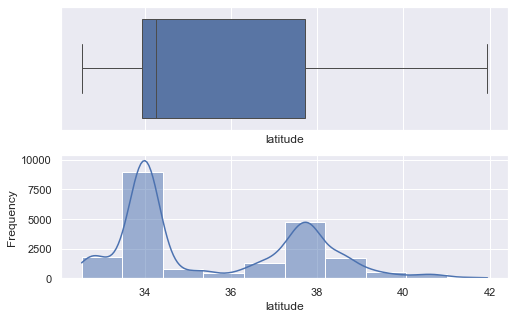

<Figure size 576x360 with 0 Axes>

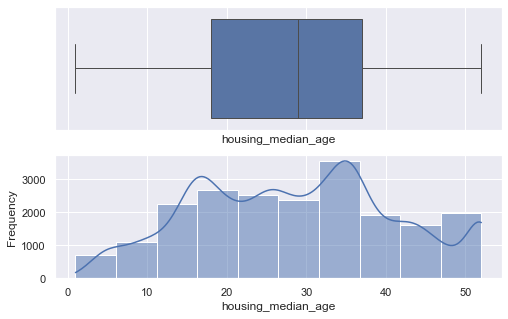

<Figure size 576x360 with 0 Axes>

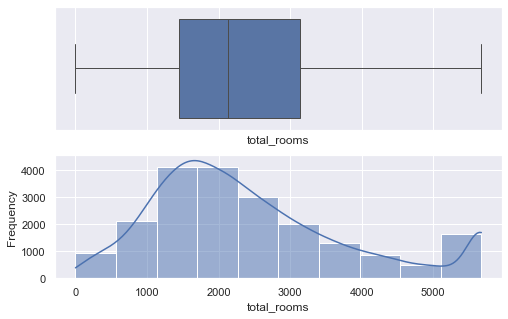

<Figure size 576x360 with 0 Axes>

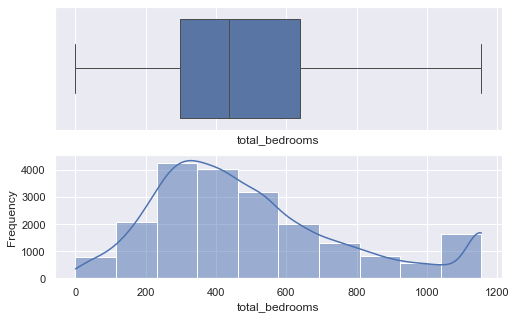

<Figure size 576x360 with 0 Axes>

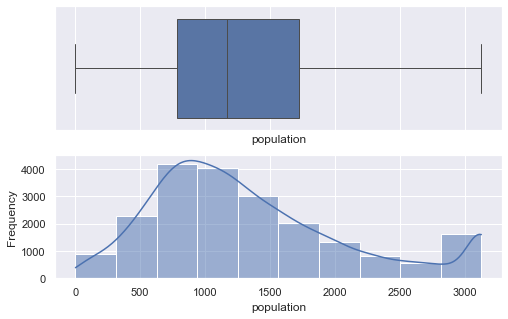

<Figure size 576x360 with 0 Axes>

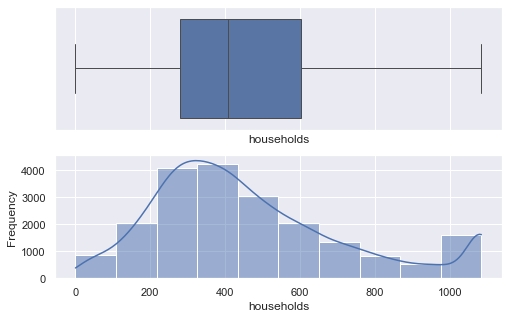

<Figure size 576x360 with 0 Axes>

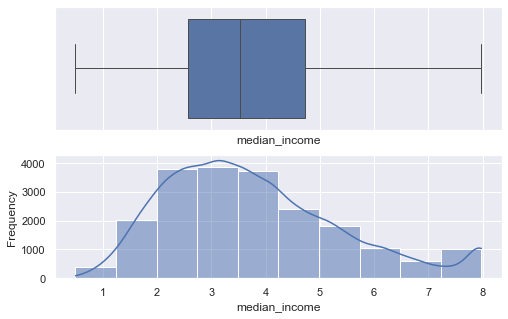

<Figure size 576x360 with 0 Axes>

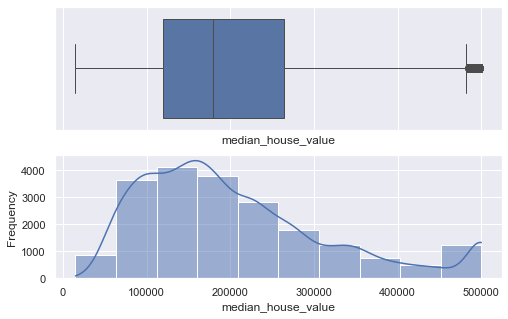

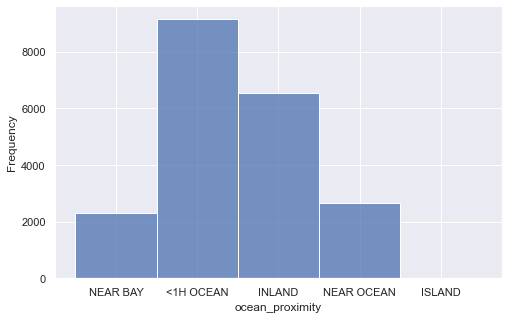

In [75]:
upperLimit=10000
df['population']=np.where((df['population']>upperLimit),df['population'].median(), df['population'])
upperLimit=20000
df['total_rooms']=np.where((df['total_rooms']>upperLimit),df['total_rooms'].median(), df['total_rooms'])
upperLimit=3000
df['total_bedrooms']=np.where((df['total_bedrooms']>upperLimit),df['total_bedrooms'].median(), df['total_bedrooms'])
upperLimit=3000
df['households']=np.where((df['households']>upperLimit),df['households'].median(), df['households'])
upperLimit=14
df['median_income']=np.where((df['median_income']>upperLimit),df['median_income'].median(), df['median_income'])
visualize(df)

<AxesSubplot:>

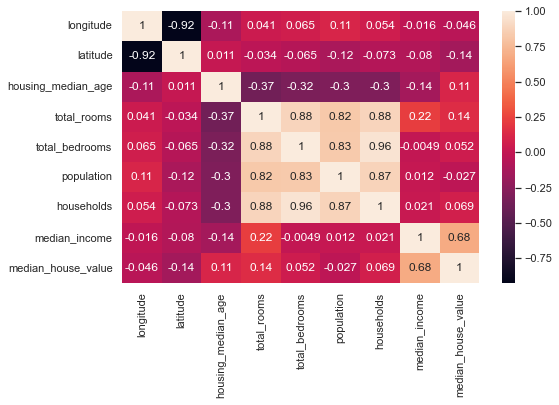

In [76]:
sns.heatmap(dt.corr(),annot=True)

In [78]:
calcVIF(df.drop(['ocean_proximity'],axis=1))

,feature,VIF
0,longitude,668.063838
1,latitude,587.090421
2,housing_median_age,8.108650
3,total_rooms,44.196474
4,total_bedrooms,88.511765
5,population,24.644831
6,households,100.469931
7,median_income,20.067610
8,median_house_value,10.092086


In [82]:
x=df.drop(['ocean_proximity','median_house_value'],axis=1).values
y=df['median_house_value'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [83]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)
result=pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predict})

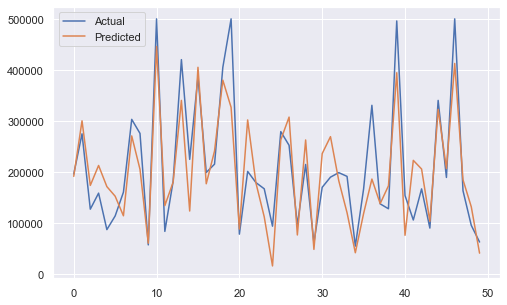

In [84]:
plt.plot(result[:50])
plt.legend(["Actual" , "Predicted"])

In [85]:
evaluate(lr,x_train , y_train, x_test , y_test, y_predict)

score x_train , y_train : 0.6369963893559296
score x_test , y_test : 0.6217905899623664
r2_score : 0.6217905899623664
mean absolute err : 51476.552457673555


In [86]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [87]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)
result=pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predict})

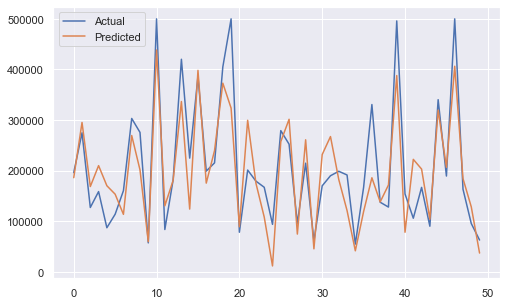

In [88]:
plt.plot(result[:50])
plt.legend(["Actual" , "Predicted"])

In [89]:
evaluate(lr,x_train , y_train, x_test , y_test, y_predict)

score x_train , y_train : 0.6369963893559296
score x_test , y_test : 0.6221134903806895
r2_score : 0.6221134903806895
mean absolute err : 51167.60942369132


In [90]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [91]:
ls=linear_model.Lasso()
ls.fit(x_train , y_train)
y_predict=lr.predict(x_test)
result=pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predict})

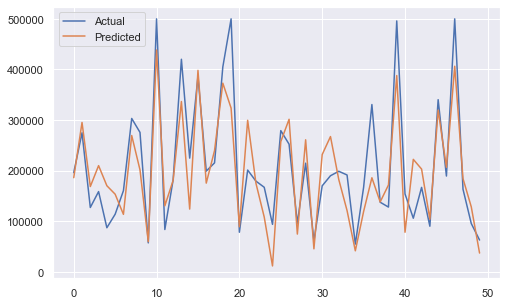

In [92]:
plt.plot(result[:50])
plt.legend(["Actual" , "Predicted"])

In [95]:
evaluate(ls,x_train , y_train, x_test , y_test, y_predict)

score x_train , y_train : 0.6369963786327835
score x_test , y_test : 0.6221155706256539
r2_score : 0.622119509297714
mean absolute err : 51165.20050997589


In [94]:
rd=linear_model.BayesianRidge()
rd.fit(x_train , y_train)
y_predict=rd.predict(x_test)
result=pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predict})

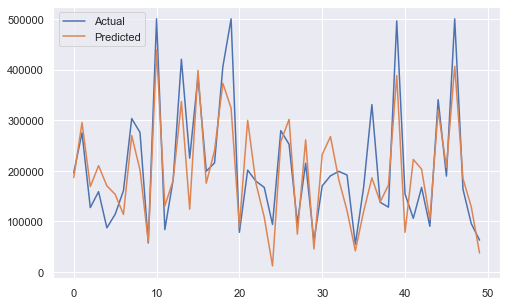

In [96]:
plt.plot(result[:50])
plt.legend(["Actual" , "Predicted"])

In [97]:
evaluate(ls,x_train , y_train, x_test , y_test, y_predict)

score x_train , y_train : 0.6369963786327835
score x_test , y_test : 0.6221155706256539
r2_score : 0.622119509297714
mean absolute err : 51165.20050997589


In [98]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [99]:
rd=linear_model.BayesianRidge()
rd.fit(x_train , y_train)
y_predict=rd.predict(x_test)
result=pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predict})

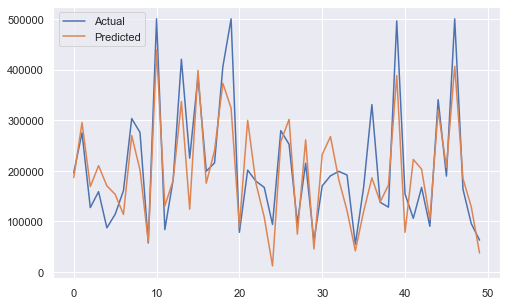

In [100]:
plt.plot(result[:50])
plt.legend(["Actual" , "Predicted"])

In [101]:
evaluate(rd,x_train , y_train, x_test , y_test, y_predict)

score x_train , y_train : 0.6369961176712887
score x_test , y_test : 0.622119509297714
r2_score : 0.622119509297714
mean absolute err : 51165.20050997589
